In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from fuzzywuzzy import fuzz
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import warnings
import matplotlib.pyplot as plt
import pulp as pl
from pulp import LpMaximize, LpProblem, lpSum, LpVariable
import _pickle as pkl
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Parte 1: dados scouts jogadores

In [2]:
df = pd.read_csv('dados_agregados_amostras.csv')
df

,A,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,home.attack,home.defend,home.score.x,pred.away.score,pred.home.score,risk_points,variable
0,0.0,36540,1.0,0.0,16,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.00,2,12.88,-2.12,0.0,1,1.0,2014,0.000000,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,1.000000,0.000000,1.0,0.500000,1.0,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1
1,0.0,36540,0.0,0.0,16,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,3.4,2.70,2,12.04,-0.84,2.0,2,0.0,2014,0.000000,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.333333,1.0,0.0,1.0,1.800000,0.666667,1.0,0.333333,1.0,1.00,2.0,0.0,0.0,2.0,0.0,0.0,1.000000,2
2,0.0,36540,1.0,0.0,16,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.1,1.83,2,10.85,-1.19,1.0,3,0.0,2014,0.000000,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.250000,1.0,0.250000,1.0,1.250000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.500000,1.0,0.0,1.0,1.375000,0.750000,1.0,0.250000,1.0,1.00,1.0,0.0,0.0,2.0,0.0,0.0,1.000000,1
3,0.0,36540,0.0,0.0,16,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.9,1.60,2,10.61,-0.24,0.0,4,0.0,2014,0.000000,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,1.200000,1.2,0.400000,0.4,0.200000,0.2,1.200000,1.2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.600000,1.6,0.0,0.0,1.280000,0.600000,0.6,0.200000,0.2,1.28,1.0,0.0,0.0,2.0,0.0,0.0,1.000000,1
4,0.0,36540,1.0,0.0,16,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.2,1.52,2,10.45,-0.16,0.0,5,1.0,2014,0.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.833333,2.2,0.333333,0.4,0.333333,0.4,1.000000,1.2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.333333,1.6,0.0,0.0,1.266667,0.500000,0.6,0.333333,0.4,1.52,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17562,1.0,79042,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-4.0,0.0,11.3,5.43,2,3.50,1.28,3.0,35,0.0,2015,0.016667,0.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.183333,0.2,0.016667,0.0,0.033333,0.0,0.116667,0.0,0.000000,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.200000,0.0,0.0,0.0,0.858333,0.183333,0.8,0.050000,0.2,3.26,2.0,0.0,0.0,4.0,0.0,0.0,3.743454,2
17563,0.0,79892,0.0,0.0,8,0.0,0.0,-2.0,0.0,-1.0,-3.0,0.0,0.0,0.0,0.0,0.0,9.0,-3.0,0.0,-2.0,0.01,4,2.25,-0.56,-1.0,35,0.0,2015,0.013514,0.0,0.040541,0.0,0.0,0.0,0.0,0.0,0.162162,0.0,0.040541,0.0,0.040541,0.0,0.364865,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.445946,0.0,0.0,0.0,0.160811,0.081081,0.0,0.000000,0.0,-0.40,0.0,0.0,0.0,1.0,0.0,0.0,0.692901,1
17564,0.0,80281,1.0,0.0,4,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.6,-1.60,2,6.32,-1.68,1.0,35,0.0,2015,0.000000,0.0,0.162162,0.0,0.0,0.0,0.0,0.0,0.635135,0.6,0.040541,0.0,0.094595,0.0,0.310811,0.2,0.013514,0.0,0.067568,0.0,0.0,0.0,0.0,0.0,0.108108,0.0,0.932432,0.2,0.0,0.0,1.337838,0.405405,0.2,0.162162,0.0,-0.32,3.0,0.0,0.0,3.0,0.0,0.0,0.505964,1
17565,0.0,79892,-1.0,0.0,8,0.0,0.0,-2.0,0.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,10.0,-3.0,0.0,0.5,0.06,4,2.66,0.41,-1.0,36,0.0,2015,0.013333,0.0,0.040000,0.0,0.0,0.0,0.0,0.0,0.160000,0.0,0.040000,0.0,0.040000,0.0,0.373333,0.2,0.000000,0.0,0

In [3]:
df.drop(['avg.A', 'avg.A.l05', 'avg.CA', 'avg.CV.l05', 'avg.DD',
       'avg.DD.l05', 'avg.DP', 'avg.DP.l05', 'avg.FC', 'avg.FC.l05', 'avg.FD',
       'avg.FD.l05', 'avg.FF', 'avg.FF.l05', 'avg.FS', 'avg.FS.l05', 'avg.FT',
       'avg.FT.l05', 'avg.G', 'avg.G.l05', 'avg.GC', 'avg.GC.l05', 'avg.GS',
       'avg.GS.l05', 'avg.I', 'avg.I.l05', 'avg.PE', 'avg.PE.l05', 'avg.PP',
       'avg.PP.l05', 'avg.Points', 'avg.RB', 'avg.RB.l05', 'avg.SG',
       'avg.SG.l05', 'avg.last05', 'away.score.x', 'home.attack',
       'home.defend', 'home.score.x', 'pred.away.score', 'pred.home.score',
       'risk_points'], inplace=True, axis=1)

In [4]:
df.rename(index=int, columns={'Posicao':'PosicaoID','RB':'DS','PE':'PI','DD':'DE'},inplace=True)

In [5]:
df = df[['AtletaID','PosicaoID','ClubeID','Rodada','ano','Pontos','Preco','PrecoVariacao',
        'PontosMedia','Jogos','DS', 'FC', 'FD', 'FF', 'FS', 'PI', 'SG', 'CA', 'DP',
        'GS', 'A', 'G', 'FT', 'I', 'PP', 'CV', 'GC','DE']]

In [6]:
df['DE'] = df['DE']/3

In [7]:
times = {'América-MG': 1, 'Atlético-GO': 2, 'Atlético-MG': 3, 'Atlético-PR': 4, 'Avaí': 5, 
         'Bahia': 6, 'Botafogo': 7, 'Chapecoense': 8, 'Corinthians': 9, 'Coritiba': 10, 
         'Cruzeiro': 11, 'Figueirense': 12, 'Flamengo': 13, 'Fluminense': 14, 'Grêmio': 15, 
         'Internacional': 16, 'Palmeiras': 17, 'Ponte Preta': 18, 'Santa Cruz': 19, 
         'Santos': 20, 'Sport': 21, 'São Paulo': 22, 'Vasco': 23, 'Vitória': 24}
for time in times:
    df.loc[df['ClubeID']==times[time],'Clube'] = time

In [8]:
df['Clube'] = np.where(df['Clube']=='Atlético-PR','Athlético-PR',df['Clube'])

In [9]:
def add_valor(time,ano,valor):
    df.loc[(df['Clube']==time) & (df['ano']== ano),'Valor_time'] = valor

In [10]:
time_valor_2017 = {'Flamengo':84.08, 'Corinthians':49.5, 'Fluminense':36.55, 'Palmeiras':67.4,
       'Cruzeiro':74.83, 'Bahia':34.25, 'Ponte Preta':33.45, 'Avaí':4.9,
       'Grêmio':59.45, 'Coritiba':30.08, 'Santos':54.35,
       'Atlético-GO':14.9, 'Chapecoense':36.93, 'Vasco':35.85,
       'Atlético-MG':78.1, 'Athlético-PR':43.68, 'Vitória':38.75,
       'Botafogo':30.2, 'Sport':42.9, 'São Paulo':92.05}
for time in time_valor_2017:
    add_valor(f'{time}',2017,time_valor_2017[time])

In [11]:
time_valor_2016 = {'Flamengo':55.55, 'Palmeiras':69.95, 'Atlético-MG':62.55, 'Coritiba':19.6,
       'Botafogo':12.65, 'Santa Cruz':10.65, 'Corinthians':48.2,
       'Figueirense':20.95, 'América-MG':30.15, 'Internacional':43.6, 'Ponte Preta':28.15,
       'Fluminense':53.85, 'Cruzeiro':54.85, 'Santos':36, 'Athlético-PR':40.73,
       'Vitória':23.45, 'São Paulo':62.95, 'Grêmio':54.53,
       'Chapecoense':35.2, 'Sport':42.5}
for time in time_valor_2016:
    add_valor(f'{time}',2016,time_valor_2016[time])

In [12]:
time_valor_2015 = {'Palmeiras':59.15, 'Chapecoense':6.75, 'Fluminense':52.35, 'Grêmio':31.35,
       'São Paulo':88.8, 'Cruzeiro':58.65, 'Athlético-PR':12.5, 'Sport':20.85,
       'Vasco':17.4, 'Avaí':9.65, 'Coritiba':15.85, 'Goiás':7.25,
       'Corinthians':52.85, 'Figueirense':12.15, 'Santos':20.03, 'Flamengo':34.45,
       'Atlético-MG':53.78, 'Ponte Preta':7.7, 'Internacional':55.5,}
for time in time_valor_2015:
    add_valor(f'{time}',2015,time_valor_2015[time])

In [13]:
time_valor_2014 = {'Fluminense':39.15, 'Internacional':19.75, 'Chapecoense':4.4, 'São Paulo':93.15,
       'Athlético-PR':9.05, 'Atlético-MG':50.95, 'Bahia':16.75,
       'Flamengo':29.1, 'Santos':42.35, 'Coritiba':17.6,
       'Palmeiras':20.1, 'Botafogo':23.45, 'Corinthians':62.85, 'Cruzeiro':41.95,
       'Vitória':12.55, 'Sport':8.3, 'Grêmio':30.1,
       'Figueirense':5.2, 'Goiás':4.25}
for time in time_valor_2014:
    add_valor(f'{time}',2014,time_valor_2014[time])

In [14]:
df_rankings= pd.read_html('https://pt.wikipedia.org/wiki/Lista_dos_20_primeiros_colocados_do_Ranking_Nacional_de_Clubes_por_ano', header =None)
df_ranking = df_rankings[1]
for i in range(2,8):
    df_ranking = pd.concat([df_ranking,df_rankings[i]])

In [15]:
df_ranking.drop(['Pos..1','UF'], inplace=True, axis=1)
df_ranking.rename(index=int, columns={'Pos.':'Posicao','Clube':'Time'},inplace=True)
df_ranking['Time'] = np.where(df_ranking['Time']=='Palmeiras e Cruzeiro','Palmeiras',df_ranking['Time'])

In [16]:
nova_linha = ['1º','Cruzeiro',15288]
def Insert_row_(row_number, df, row_value):
    # Slice the upper half of the dataframe
    df1 = df[0:row_number]
   
    # Store the result of lower half of the dataframe
    df2 = df[row_number:]
   
    # Inser the row in the upper half dataframe
    df1.loc[row_number]=row_value
   
    # Concat the two dataframes
    df_result = pd.concat([df1, df2])
   
    # Reassign the index labels
    df_result.index = [*range(df_result.shape[0])]
   
    # Return the updated dataframe
    return df_result
df_ranking = Insert_row_(101, df_ranking, nova_linha)

In [17]:
df_ranking['Time'] = np.where(df_ranking['Time']=='Atlético Paranaense','Athlético-PR',df_ranking['Time'])

In [18]:
df_ranking['Temporada'] = 0
df_ranking.iloc[0:20,3] = 2013
df_ranking.iloc[20:40,3] = 2014
df_ranking.iloc[40:60,3] = 2015
df_ranking.iloc[60:80,3] = 2016
df_ranking.iloc[80:100,3] = 2017
df_ranking.iloc[100:120,3] = 2018
df_ranking.iloc[120:,3] = 2019

In [19]:
df_rankingf = df_ranking[(df_ranking.Temporada == 2014) | (df_ranking.Temporada == 2015)
                 |(df_ranking.Temporada == 2016) | (df_ranking.Temporada == 2017)]

In [20]:
df_rankingf['Time'] = np.where(df_rankingf['Time']=='Vasco da Gama','Vasco',df_rankingf['Time'])
df_rankingf['Time'] = np.where(df_rankingf['Time']=='Atlético Mineiro','Atlético-MG',df_rankingf['Time'])
df_rankingf['Time'] = np.where(df_rankingf['Time']=='Atlético Goianiense','Atlético-GO',df_rankingf['Time'])

In [21]:
def add_ranking(time):
    for i in range(2014,2018):
        aux = int(df_rankingf.loc[(df_rankingf['Time']==time) & (df_rankingf['Temporada']== i),'Pontos'])
        df.loc[(df['Clube']==time) & (df['ano']== i),'Ranking_cbf'] = aux

In [22]:
def add_ranking2(time,ano):
    aux = int(df_rankingf.loc[(df_rankingf['Time']==time) & (df_rankingf['Temporada']== ano),'Pontos'])
    df.loc[(df['Clube']==time) & (df['ano']== ano),'Ranking_cbf'] = aux

In [23]:
add_ranking('Vasco')
add_ranking('Internacional')
add_ranking('Flamengo')
add_ranking('Grêmio')
add_ranking('Palmeiras')
add_ranking('Athlético-PR')
add_ranking('São Paulo')
add_ranking('Santos')
add_ranking('Atlético-MG')
add_ranking('Cruzeiro')
add_ranking('Coritiba')
add_ranking('Fluminense')
add_ranking('Vitória')
add_ranking('Corinthians')
add_ranking('Botafogo')

In [24]:
add_ranking2('Chapecoense',2017)
df.loc[(df['Clube']=='Chapecoense') & (df['ano']== 2014),'Ranking_cbf'] = 3557
df.loc[(df['Clube']=='Chapecoense') & (df['ano']== 2015),'Ranking_cbf'] = 5150
df.loc[(df['Clube']=='Chapecoense') & (df['ano']== 2016),'Ranking_cbf'] = 6336
df.loc[(df['Clube']=='Atlético-GO') & (df['ano']== 2017),'Ranking_cbf'] = 5443
df.loc[(df['Clube']=='América-MG') & (df['ano']== 2016),'Ranking_cbf'] = 5202
add_ranking2('Bahia',2014)
df.loc[(df['Clube']=='Bahia') & (df['ano']== 2017),'Ranking_cbf'] = 6698
df.loc[(df['Clube']=='Sport') & (df['ano']== 2014),'Ranking_cbf'] = 6740
add_ranking2('Sport',2015)
add_ranking2('Sport',2016)
add_ranking2('Sport',2017)
df.loc[(df['Clube']=='Santa Cruz') & (df['ano']== 2016),'Ranking_cbf'] = 4310
df.loc[(df['Clube']=='Avaí') & (df['ano']== 2015),'Ranking_cbf'] = 6364
df.loc[(df['Clube']=='Avaí') & (df['ano']== 2017),'Ranking_cbf'] = 5894
df.loc[(df['Clube']=='Figueirense') & (df['ano']== 2014),'Ranking_cbf'] = 6248
df.loc[(df['Clube']=='Figueirense') & (df['ano']== 2015),'Ranking_cbf'] = 6898
add_ranking2('Ponte Preta',2016)
add_ranking2('Ponte Preta',2017)
add_ranking2('Figueirense',2016)
add_ranking2('Figueirense',2017)

In [25]:
df = df.dropna()

# Parte 2: dados tabela

In [26]:
df2 = pd.read_csv('dados_tabela.csv')

In [27]:
df2 = df2[(df2.Temporada == 2014) | (df2.Temporada == 2015)
                 |(df2.Temporada == 2016) | (df2.Temporada == 2017)]

In [28]:
for time1 in np.sort(df2.Time.unique()):
    for time2 in np.sort(df.Clube.unique()):
        teste = fuzz.partial_ratio(time1,time2)
        if teste >=75:
            df2['Time'] = np.where(df2['Time']==time1,time2,df2['Time'])  

In [29]:
pd.set_option('display.max_rows', 10)
df2

,Posicao,Time,Rodada_atual,Vitorias,Empates,Derrotas,Saldo_gols,Pontuacao,Temporada,Ranking_cbf,Valor_time,Gols_marcados,Gols_sofridos,Taxa_gols,Aproveitamento
760,1,São Paulo,1,1,0,0,3,3,2014,13712,93.15,3,0,1.000,1.000000
761,2,Cruzeiro,1,1,0,0,1,3,2014,13512,41.95,2,1,2.000,1.000000
762,3,Palmeiras,1,1,0,0,1,3,2014,12680,20.10,2,1,2.000,1.000000
763,4,Athlético-PR,1,1,0,0,1,3,2014,12952,9.05,1,0,1.000,1.000000
764,5,Internacional,1,1,0,0,1,3,2014,13856,19.75,1,0,1.000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,16,Vitória,38,11,10,17,-8,43,2017,7547,38.75,50,58,0.862,0.377193
3796,17,Coritiba,38,11,10,17,-9,43,2017,9414,30.08,42,51,0.824,0.377193
3797,18,Avaí,38,10,13,15,-19,43,2017,5894,4.90,29,48,0.604,0.377193
3798,19,Ponte Preta,38,10,9,19,-15,39,2017,9076,33.45,37,52,0.712,0.342105


In [30]:
rodada = []
for i in range(2014,2018):
    for j in range(1,39):
        for k in range(0,20):
            rodada.append(j)

In [31]:
df2 = df2.assign(Rodada_atual = rodada)

In [32]:
def funcao(time,ano,rodada):
    aux = float(df2.loc[(df2['Time']==time) & (df2['Temporada']== ano) 
                      & (df2['Rodada_atual']== rodada),'Aproveitamento'])
    aux2 = int(df2.loc[(df2['Time']==time) & (df2['Temporada']== ano) 
                      & (df2['Rodada_atual']== rodada),'Saldo_gols'])
    aux3 = int(df2.loc[(df2['Time']==time) & (df2['Temporada']== ano) 
                      & (df2['Rodada_atual']== rodada),'Gols_marcados'])
    aux4 = int(df2.loc[(df2['Time']==time) & (df2['Temporada']== ano) 
                      & (df2['Rodada_atual']== rodada),'Gols_sofridos'])
    df.loc[(df['Clube']==time) & (df['ano']== ano)
               & (df['Rodada']== rodada),'Aproveitamento_time'] = aux
    df.loc[(df['Clube']==time) & (df['ano']== ano)
               & (df['Rodada']== rodada),'SG_time'] = aux2
    df.loc[(df['Clube']==time) & (df['ano']== ano)
               & (df['Rodada']== rodada),'Gols_marcados_time'] = aux3
    df.loc[(df['Clube']==time) & (df['ano']== ano)
               & (df['Rodada']== rodada),'Gols_sofridos_time'] = aux4

In [33]:
for time in df.Clube.unique():
    for ano in range(2014,2018):
        for rodada in range(1,39):
            if df.isin(df.loc[(df['Clube']==time) & (df['ano']== ano) & (df['Rodada']== rodada)]).any().any() == True:
                funcao(time,ano,rodada)

In [34]:
# pd.set_option('display.max_rows', 10)
df

,AtletaID,PosicaoID,ClubeID,Rodada,ano,Pontos,Preco,PrecoVariacao,PontosMedia,Jogos,DS,FC,FD,FF,FS,PI,SG,CA,DP,GS,A,G,FT,I,PP,CV,GC,DE,Clube,Valor_time,Ranking_cbf,Aproveitamento_time,SG_time,Gols_marcados_time,Gols_sofridos_time
0,36540,2,16,1,2014,2.0,12.88,-2.12,2.00,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Internacional,19.75,13856.0,1.000000,1.0,1.0,0.0
1,36540,2,16,2,2014,3.4,12.04,-0.84,2.70,2.0,2.0,2.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Internacional,19.75,13856.0,0.666667,1.0,3.0,2.0
2,36540,2,16,3,2014,0.1,10.85,-1.19,1.83,3.0,1.0,2.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Internacional,19.75,13856.0,0.777778,2.0,5.0,3.0
3,36540,2,16,4,2014,0.9,10.61,-0.24,1.60,4.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Internacional,19.75,13856.0,0.833333,3.0,7.0,4.0
4,36540,2,16,5,2014,1.2,10.45,-0.16,1.52,5.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Internacional,19.75,13856.0,0.733333,3.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17562,79042,2,3,35,2015,11.3,3.50,1.28,5.43,3.0,3.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlético-MG,53.78,13224.0,0.619048,16.0,59.0,43.0
17563,79892,4,8,35,2015,-2.0,2.25,-0.56,0.01,9.0,-1.0,-2.0,0.0,-1.0,-3.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chapecoense,6.75,5150.0,0.438095,-5.0,33.0,38.0
17564,80281,2,4,35,2015,-1.6,6.32,-1.68,-1.60,1.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Athlético-PR,12.50,12524.0,0.447619,-4.0,39.0,43.0
17565,79892,4,8,36,2015,0.5,2.66,0.41,0.06,10.0,-1.0,-2.0,0.0,-1.0,-2.0,-3.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chapecoense,6.75,5150.0,0.435185,-5.0,33.0,38.0


# Parte 3: Machine Learning

In [35]:
pd.set_option('display.max_rows', 30)
def select_kbest_clf(data_frame, target, k='all'):
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["Atributo"] = data_frame.drop(target, axis=1).columns
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["Valor p"] = feat_selector.pvalues_
    
    return feat_scores
df_aux = df.drop(['Clube','Rodada','ano','ClubeID'],1)
kbest_feat = select_kbest_clf(df_aux, 'Pontos', k='all')
kbest_feat = kbest_feat.sort_values(["F Score", "Valor p"], ascending=[False, False])
kbest_feat

,Atributo,F Score,Valor p
3,PrecoVariacao,78.561218,0.000000e+00
17,G,49.799512,0.000000e+00
6,DS,20.065874,0.000000e+00
15,GS,18.392085,0.000000e+00
21,CV,18.020852,0.000000e+00
4,PontosMedia,17.798794,0.000000e+00
23,DE,17.354301,0.000000e+00
22,GC,17.054529,0.000000e+00
12,SG,16.665322,0.000000e+00
16,A,12.305803,0.000000e+00


In [36]:
Pontos = df['Pontos']
atributos = df.drop(['Rodada','ano','Clube','ClubeID','Pontos','PrecoVariacao'],1)

In [37]:
scaler = StandardScaler()
atrib_norm = scaler.fit_transform(atributos)
atrib_norm=pd.DataFrame(atrib_norm)
atrib_norm.columns = atributos.columns

In [38]:
prop_test = 0.3
X_train, X_test, d_train, d_test= train_test_split(atrib_norm,Pontos, test_size = prop_test)

In [39]:
floresta = RandomForestRegressor(n_estimators = 100)
model_XGBR = XGBRegressor()
extratrees = ExtraTreesRegressor()
mlp = MLPRegressor(hidden_layer_sizes=(40,30,20),max_iter=5000,activation = 'logistic')

In [40]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR2:{r2:.2%}\nRSME:{RSME:.2f}'

In [41]:
modelos = {'RandomForest': floresta,
            'XGBoost': model_XGBR,
            'ExtraTrees': extratrees,
            'MLP':mlp
            }

Modelo RandomForest:
R2:96.74%
RSME:0.78
Modelo XGBoost:
R2:99.08%
RSME:0.41
Modelo ExtraTrees:
R2:97.90%
RSME:0.62
Modelo MLP:
R2:99.99%
RSME:0.05


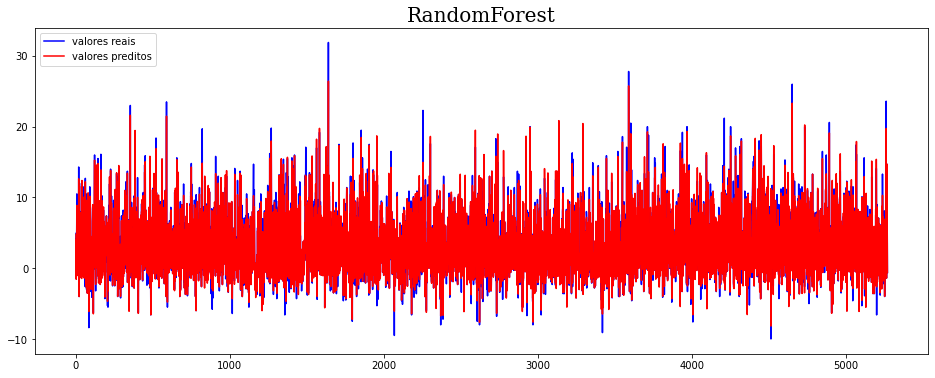

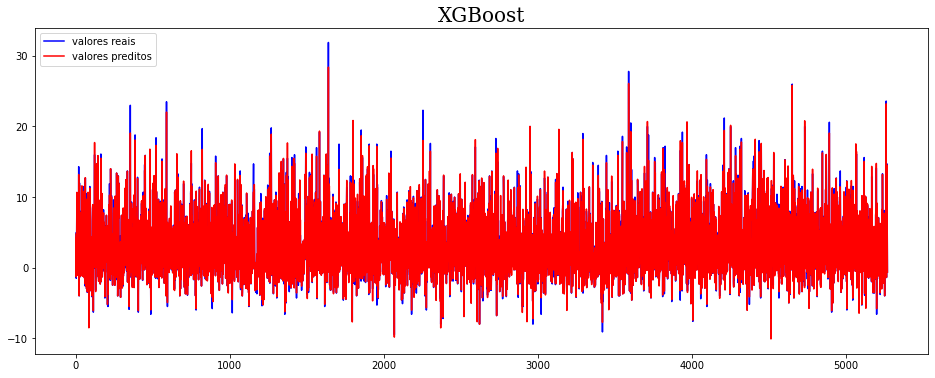

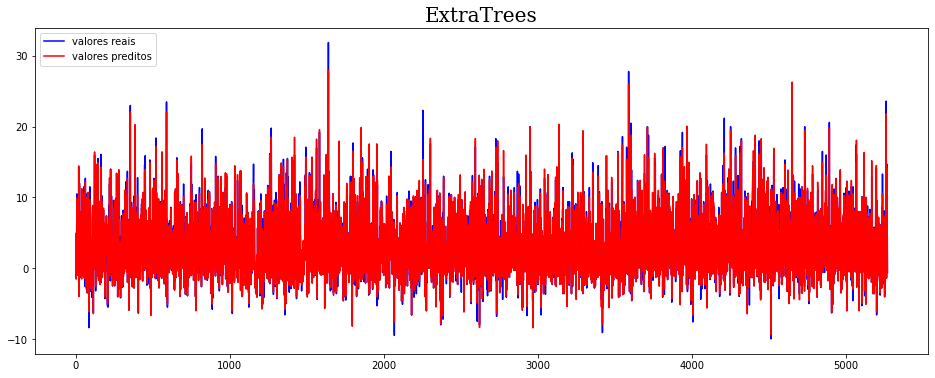

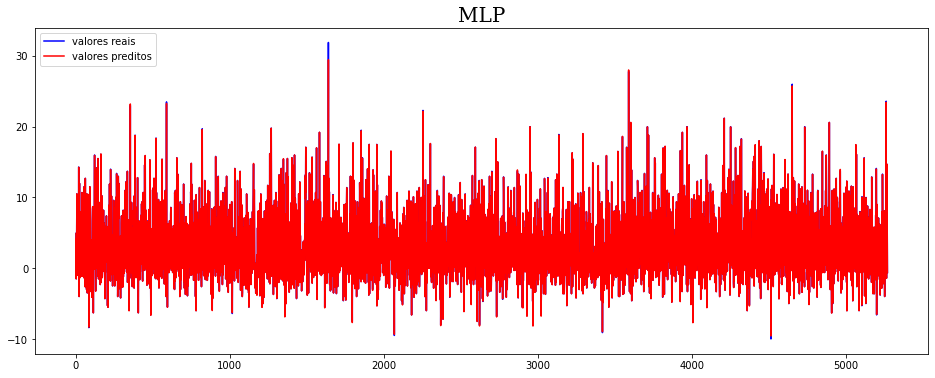

In [42]:
for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, d_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, d_test, previsao))
    plt.figure(figsize=(16,6))
    font1 = {'family':'serif','color':'black','size':20}
    plt.title(f'{nome_modelo}',fontdict = font1)
    plt.plot(range(d_test.shape[0]), d_test.values, color='blue',label = 'valores reais')
    plt.plot(range(previsao.shape[0]), previsao, color='red',label = 'valores preditos')
    plt.legend(loc="upper left")

In [43]:
# filename1 = 'finalized_model_XGBR.sav'
# filename2 = 'finalized_model_mlp.sav'
# pkl.dump(model_XGBR, open(filename1, 'wb'))
# pkl.dump(mlp, open(filename2, 'wb'))

## Coletando dados de scout da rodada atual

In [44]:
rodada_atual = pd.read_excel('cartola.xlsx')

In [45]:
rodada_atual = rodada_atual.loc[(rodada_atual.Status == 'Provável') & (rodada_atual.Posicao != 'Técnico')] 

In [46]:
scouts_pesos = {'DS':1., 'FC':-0.5, 'FD':1.2, 'FF':0.8, 'FS':0.5, 'PI':-0.1, 'SG':5., 'CA':-2., 'DP':7., 'GS':-1.,
               'A':5., 'G':8, 'FT':3., 'I':-0.5, 'PP':-4., 'CV':-5., 'GC':-5.,'DE':1}

In [47]:
for scout in scouts_pesos:
    rodada_atual[f'{scout}'] = rodada_atual[f'{scout}'] * scouts_pesos[scout]

## Coletando dados da tabela da rodada atual

In [48]:
rodada = rodada_atual.Rodada.unique()[0]
df_2021_aux = pd.read_html(f'https://www.worldfootball.net/schedule/bra-serie-a-2021-spieltag/{rodada}/', header = 0)
df_2021 = df_2021_aux[3]

In [49]:
df_2021.drop(['Team'], inplace=True, axis=1)
df_2021.rename(index=str, columns={'#': 'Posicao', 'Team.1': 'Time', 'M.': 'Rodada_atual', 'W': 'Vitorias',
                              'D': 'Empates', 'L': 'Derrotas', 'goals': 'Gols',
                               'Dif.': 'Saldo_gols', 'Pt.': 'Pontuacao'}, inplace=True)
df_2021['Posicao'] = pd.to_numeric(df_2021.index) + 1

In [50]:
df_2021['Ranking_2021'] = 0
df_2021.loc[df_2021['Time']=='São Paulo FC','Ranking_2021'] = 11870
df_2021.loc[df_2021['Time']=='Sport - PE','Ranking_2021'] = 7043
df_2021.loc[df_2021['Time']=='Bahia - BA','Ranking_2021'] = 10175
df_2021.loc[df_2021['Time']=='Atlético Mineiro','Ranking_2021'] = 11789
df_2021.loc[df_2021['Time']=='Grêmio Porto Alegre','Ranking_2021'] = 15180
df_2021.loc[df_2021['Time']=='Santos FC','Ranking_2021'] = 12776
df_2021.loc[df_2021['Time']=='Internacional','Ranking_2021'] = 13310
df_2021.loc[df_2021['Time']=='Athletico Paranaense','Ranking_2021'] = 12968
df_2021.loc[df_2021['Time']=='Atlético Goianiense','Ranking_2021'] = 7310
df_2021.loc[df_2021['Time']=='Corinthians SP','Ranking_2021'] = 12032
df_2021.loc[df_2021['Time']=='Red Bull Bragantino','Ranking_2021'] = 6332 
df_2021.loc[df_2021['Time']=='Ceará - CE','Ranking_2021'] = 9128
df_2021.loc[df_2021['Time']=='Flamengo RJ','Ranking_2021'] = 16768
df_2021.loc[df_2021['Time']=='Fluminense RJ','Ranking_2021'] = 9666
df_2021.loc[df_2021['Time']=='Fortaleza','Ranking_2021'] = 8086
df_2021.loc[df_2021['Time']=='Palmeiras','Ranking_2021'] = 16110
df_2021.loc[df_2021['Time']=='Juventude - RS','Ranking_2021'] = 5725
df_2021.loc[df_2021['Time']=='Cuiabá - MT','Ranking_2021'] = 5679
df_2021.loc[df_2021['Time']=='América - MG','Ranking_2021'] = 8404
df_2021.loc[df_2021['Time']=='Chapecoense','Ranking_2021'] = 8985

In [51]:
df_2021['Valor_time_mi'] = 0
df_2021.loc[df_2021['Time']=='São Paulo FC','Valor_time_mi'] = 78.3
df_2021.loc[df_2021['Time']=='Sport - PE','Valor_time_mi'] = 20.5
df_2021.loc[df_2021['Time']=='Bahia - BA','Valor_time_mi'] = 21.93
df_2021.loc[df_2021['Time']=='Atlético Mineiro','Valor_time_mi'] = 85.65
df_2021.loc[df_2021['Time']=='Grêmio Porto Alegre','Valor_time_mi'] = 95.75
df_2021.loc[df_2021['Time']=='Santos FC','Valor_time_mi'] = 69.98
df_2021.loc[df_2021['Time']=='Internacional','Valor_time_mi'] = 69.85
df_2021.loc[df_2021['Time']=='Athletico Paranaense','Valor_time_mi'] = 54.7
df_2021.loc[df_2021['Time']=='Juventude - RS','Valor_time_mi'] = 13.5
df_2021.loc[df_2021['Time']=='Atlético Goianiense','Valor_time_mi'] = 14.98
df_2021.loc[df_2021['Time']=='Corinthians SP','Valor_time_mi'] = 56.05
df_2021.loc[df_2021['Time']=='Red Bull Bragantino','Valor_time_mi'] = 61.03
df_2021.loc[df_2021['Time']=='Ceará - CE','Valor_time_mi'] = 18.7
df_2021.loc[df_2021['Time']=='Chapecoense','Valor_time_mi'] = 15.03
df_2021.loc[df_2021['Time']=='Cuiabá - MT','Valor_time_mi'] = 16.1
df_2021.loc[df_2021['Time']=='Flamengo RJ','Valor_time_mi'] = 152.95
df_2021.loc[df_2021['Time']=='Fluminense RJ','Valor_time_mi'] = 74.68
df_2021.loc[df_2021['Time']=='Fortaleza','Valor_time_mi'] = 21.98
df_2021.loc[df_2021['Time']=='América - MG','Valor_time_mi'] = 12.9
df_2021.loc[df_2021['Time']=='Palmeiras','Valor_time_mi'] = 147.85

In [52]:
aux = df_2021['Gols'].str.split(':', n = 1, expand = True)
df_2021['Gols_marcados'] = aux[0] 
df_2021['Gols_sofridos'] = aux[1] 
df_2021 = df_2021.drop(columns=['Gols'])

In [53]:
aproveitamento = []
linhas = df_2021.shape[0]
aux1 = df_2021['Pontuacao'].values
pont_max = df_2021['Rodada_atual'].values*3
for i in range(0,linhas):
    aproveitamento.append(aux1[i]/pont_max[i])
df_2021 = df_2021.assign(Aproveitamento = aproveitamento)

In [54]:
for time1 in np.sort(df_2021.Time.unique()):
    for time2 in np.sort(rodada_atual.Clube.unique()):
        teste = fuzz.partial_ratio(time1,time2)
        if teste >=75:
            df_2021['Time'] = np.where(df_2021['Time']==time1,time2,df_2021['Time'])  

In [55]:
def funcao1(time):
    aux1 = float(df_2021.loc[(df_2021['Time']==time),'Aproveitamento'])
    aux2 = int(df_2021.loc[(df_2021['Time']==time),'Saldo_gols'])
    aux3 = int(df_2021.loc[(df_2021['Time']==time),'Ranking_2021'])
    aux4 = float(df_2021.loc[(df_2021['Time']==time),'Valor_time_mi'])
    aux5 = int(df_2021.loc[(df_2021['Time']==time),'Gols_marcados'])
    aux6 = float(df_2021.loc[(df_2021['Time']==time),'Gols_sofridos'])
    rodada_atual.loc[(rodada_atual['Clube']==time),'Valor_time'] = aux4
    rodada_atual.loc[(rodada_atual['Clube']==time),'Ranking_cbf'] = aux3
    rodada_atual.loc[(rodada_atual['Clube']==time),'Aproveitamento_time'] = aux1
    rodada_atual.loc[(rodada_atual['Clube']==time),'SG_time'] = aux2
    rodada_atual.loc[(rodada_atual['Clube']==time),'Gols_marcados_time'] = aux5
    rodada_atual.loc[(rodada_atual['Clube']==time),'Gols_sofridos_time'] = aux6

In [56]:
for time in rodada_atual.Clube.unique():
    if rodada_atual.isin(rodada_atual.loc[rodada_atual['Clube']==time]).any().any() == True:
        funcao1(time)

In [57]:
rodada_atual_aux = rodada_atual[['AtletaID', 'PosicaoID', 'Preco', 'PontosMedia',
                                    'Jogos','DS', 'FC', 'FD', 'FF', 'FS', 'PI', 'SG', 'CA', 'DP', 'GS',
                                    'A', 'G', 'FT', 'I', 'PP', 'CV', 'GC','DE', 'Valor_time', 'Ranking_cbf',
                                    'Aproveitamento_time', 'SG_time','Gols_marcados_time','Gols_sofridos_time']]

In [58]:
rodada_atual_aux

,AtletaID,PosicaoID,Preco,PontosMedia,Jogos,DS,FC,FD,FF,FS,PI,SG,CA,DP,GS,A,G,FT,I,PP,CV,GC,DE,Valor_time,Ranking_cbf,Aproveitamento_time,SG_time,Gols_marcados_time,Gols_sofridos_time
0,63172,3,4.79,0.94,10,7.0,-4.0,0.0,0.8,2.5,-4.9,15.0,-6.0,0.0,-0.0,0.0,0,0.0,-1.0,-0.0,-0.0,-0.0,0,16.10,5679.0,0.333333,-3.0,13.0,16.0
2,72294,1,12.39,4.75,14,2.0,-0.0,0.0,0.0,0.5,-0.0,35.0,-0.0,0.0,-10.0,0.0,0,0.0,-0.0,-0.0,-0.0,-0.0,39,85.65,11789.0,0.738095,11.0,21.0,10.0
9,61188,5,14.53,5.59,14,10.0,-11.0,7.2,12.0,8.0,-4.5,0.0,-2.0,0.0,-0.0,5.0,56,0.0,-2.5,-0.0,-0.0,-0.0,0,21.93,10175.0,0.404762,-5.0,18.0,23.0
10,61033,4,5.79,2.64,13,9.0,-7.0,8.4,2.4,9.5,-9.5,0.0,-2.0,0.0,-0.0,5.0,16,3.0,-0.5,-0.0,-0.0,-0.0,0,21.93,10175.0,0.404762,-5.0,18.0,23.0
11,81798,5,9.79,2.51,13,11.0,-4.5,4.8,3.2,18.5,-17.9,0.0,-10.0,0.0,-0.0,15.0,8,6.0,-1.5,-0.0,-0.0,-0.0,0,21.93,10175.0,0.404762,-5.0,18.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,105171,5,5.16,3.95,4,4.0,-3.5,6.0,3.2,3.5,-2.4,0.0,-0.0,0.0,-0.0,5.0,0,0.0,-0.0,-0.0,-0.0,-0.0,0,12.90,8404.0,0.261905,-8.0,11.0,19.0
730,92696,5,5.26,0.00,10,3.0,-5.0,2.4,0.0,4.5,-1.8,0.0,-2.0,0.0,-0.0,0.0,0,0.0,-1.0,-0.0,-0.0,-0.0,0,54.70,12968.0,0.589744,6.0,21.0,15.0
741,80129,4,4.07,1.54,5,7.0,-1.0,0.0,0.8,4.5,-1.6,0.0,-2.0,0.0,-0.0,0.0,0,0.0,-0.0,-0.0,-0.0,-0.0,0,13.50,5725.0,0.410256,-5.0,9.0,14.0
742,60969,2,5.29,2.12,6,5.0,-1.0,1.2,0.8,0.5,-3.8,5.0,-0.0,0.0,-0.0,5.0,0,0.0,-0.0,-0.0,-0.0,-0.0,0,12.90,8404.0,0.261905,-8.0,11.0,19.0


## Coletando dados da próxima rodada

In [59]:
rodada = rodada_atual.Rodada.unique()[0] + 1
df_2021_aux = pd.read_html(f'https://www.worldfootball.net/schedule/bra-serie-a-2021-spieltag/{rodada}/', header = None)
df_2021_prox = df_2021_aux[1]

In [60]:
df_2021_prox.drop([0,1,3,5,6], inplace=True, axis=1)

In [61]:
df_2021_prox.rename(index=int, columns={2:'Time_casa',4:'Time_visitante'},inplace=True)

In [62]:
for time1 in np.sort(df_2021_prox.Time_casa.unique()):
    for time2 in np.sort(rodada_atual.Clube.unique()):
        teste = fuzz.partial_ratio(time1,time2)
        if teste >=75:
            df_2021_prox['Time_casa'] = np.where(df_2021_prox['Time_casa']==time1,time2,df_2021_prox['Time_casa']) 

In [63]:
for time1 in np.sort(df_2021_prox.Time_visitante.unique()):
    for time2 in np.sort(rodada_atual.Clube.unique()):
        teste = fuzz.partial_ratio(time1,time2)
        if teste >=75:
            df_2021_prox['Time_visitante'] = np.where(df_2021_prox['Time_visitante']==time1,time2,df_2021_prox['Time_visitante']) 

In [64]:
df_2021_prox

,Time_casa,Time_visitante
0,Sport - PE,Red Bull Bragantino
1,Athlético-PR,São Paulo
2,Cuiabá,Bahia
3,Palmeiras,Fortaleza
4,América-MG,Fluminense
5,Juventude,Atlético-MG
6,Santos,Corinthians
7,Ceará,Atlético-GO
8,Flamengo,Internacional
9,Grêmio,Chapecoense


## Predict da próxima rodada

In [65]:
scaler = StandardScaler()
rodada_atual_norm = scaler.fit_transform(rodada_atual_aux)
rodada_atual_norm=pd.DataFrame(rodada_atual_norm)
rodada_atual_norm.columns = rodada_atual_aux.columns

In [66]:
previsao_floresta = floresta.predict(rodada_atual_norm)
previsao_trees = extratrees.predict(rodada_atual_norm)
previsao_XGBR = model_XGBR.predict(rodada_atual_norm)
previsao_mlp = mlp.predict(rodada_atual_norm)
prev_final = (previsao_floresta + previsao_XGBR + previsao_trees+previsao_mlp)/4

In [67]:
prev_final = pd.DataFrame(prev_final)
nome = pd.DataFrame(rodada_atual['nome'])
apelido = pd.DataFrame(rodada_atual['apelido'])
posicao = pd.DataFrame(rodada_atual['Posicao'])
clube = pd.DataFrame(rodada_atual['Clube'])
preco = pd.DataFrame(rodada_atual['Preco'])

In [68]:
tabela = pd.concat([nome.reset_index(),apelido.reset_index(),posicao.reset_index(),clube.reset_index(),preco.reset_index(), prev_final.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
tabela.drop(['index'],inplace=True, axis=1)
tabela.columns = ['Nome','Apelido','Posicao','Clube','Preco','Previsao']

In [69]:
tabela_aux = tabela[['Apelido','Posicao','Clube','Preco','Previsao']]

In [70]:
atacantes = tabela_aux.loc[tabela.Posicao == 'Atacante']
zagueiros = tabela_aux.loc[tabela.Posicao == 'Zagueiro']
meais = tabela_aux.loc[tabela.Posicao == 'Meia']
goleiros = tabela_aux.loc[tabela.Posicao == 'Goleiro']
laterais = tabela_aux.loc[tabela.Posicao == 'Lateral']

In [71]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html(index=False).replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [72]:
display_side_by_side(atacantes,zagueiros,meais,goleiros,laterais, titles=['Atacantes','Zagueiros','Meais','Goleiros','Laterais'])

Apelido,Posicao,Clube,Preco,Previsao
Bruno Henrique,Atacante,Flamengo,20.40,15.604467
Marinho,Atacante,Santos,17.86,14.677271
Robson,Atacante,Fortaleza,12.87,13.655368
Gilberto,Atacante,Bahia,14.53,13.319569
David,Atacante,Fortaleza,9.48,12.810843
Matheus Peixoto,Atacante,Juventude,15.27,11.950064
Rossi,Atacante,Bahia,9.79,9.449408
Zé Roberto,Atacante,Atlético-GO,7.64,8.134932
Marcos Guilherme,Atacante,Santos,5.89,7.404634
Jô,Atacante,Corinthians,7.78,7.308852


# Definindo quais times escolher para escalar na rodada

In [73]:
rodada = rodada_atual.Rodada.unique()[0]+1
df_2021_aux = pd.read_html(f'https://www.worldfootball.net/schedule/bra-serie-a-2021-spieltag/{rodada}/', header = None)
df_confrontos = df_2021_aux[1]

In [74]:
df_confrontos.drop([0,1,3,5,6], inplace=True, axis=1)

In [75]:
df_confrontos.rename(index=int, columns={2:'Time_casa',4:'Time_visitante'},inplace=True)

In [76]:
df_confrontos['Ranking_mand'] = 0
df_confrontos.loc[df_confrontos['Time_casa']=='São Paulo FC','Ranking_mand'] = 11870
df_confrontos.loc[df_confrontos['Time_casa']=='Sport - PE','Ranking_mand'] = 7043
df_confrontos.loc[df_confrontos['Time_casa']=='Bahia - BA','Ranking_mand'] = 10175
df_confrontos.loc[df_confrontos['Time_casa']=='Atlético Mineiro','Ranking_mand'] = 11789
df_confrontos.loc[df_confrontos['Time_casa']=='Grêmio Porto Alegre','Ranking_mand'] = 15180
df_confrontos.loc[df_confrontos['Time_casa']=='Santos FC','Ranking_mand'] = 12776
df_confrontos.loc[df_confrontos['Time_casa']=='Internacional','Ranking_mand'] = 13310
df_confrontos.loc[df_confrontos['Time_casa']=='Athletico Paranaense','Ranking_mand'] = 12968
df_confrontos.loc[df_confrontos['Time_casa']=='Atlético Goianiense','Ranking_mand'] = 7310
df_confrontos.loc[df_confrontos['Time_casa']=='Corinthians SP','Ranking_mand'] = 12032
df_confrontos.loc[df_confrontos['Time_casa']=='Red Bull Bragantino','Ranking_mand'] = 6332 
df_confrontos.loc[df_confrontos['Time_casa']=='Ceará - CE','Ranking_mand'] = 9128
df_confrontos.loc[df_confrontos['Time_casa']=='Flamengo RJ','Ranking_mand'] = 16768
df_confrontos.loc[df_confrontos['Time_casa']=='Fluminense RJ','Ranking_mand'] = 9666
df_confrontos.loc[df_confrontos['Time_casa']=='Fortaleza','Ranking_mand'] = 8086
df_confrontos.loc[df_confrontos['Time_casa']=='Palmeiras','Ranking_mand'] = 16110
df_confrontos.loc[df_confrontos['Time_casa']=='Juventude - RS','Ranking_mand'] = 5725
df_confrontos.loc[df_confrontos['Time_casa']=='Cuiabá - MT','Ranking_mand'] = 5679
df_confrontos.loc[df_confrontos['Time_casa']=='América - MG','Ranking_mand'] = 8404
df_confrontos.loc[df_confrontos['Time_casa']=='Chapecoense','Ranking_mand'] = 8985

In [77]:
df_confrontos['Ranking_visit'] = 0
df_confrontos.loc[df_confrontos['Time_visitante']=='São Paulo FC','Ranking_visit'] = 11870
df_confrontos.loc[df_confrontos['Time_visitante']=='Sport - PE','Ranking_visit'] = 7043
df_confrontos.loc[df_confrontos['Time_visitante']=='Bahia - BA','Ranking_visit'] = 10175
df_confrontos.loc[df_confrontos['Time_visitante']=='Atlético Mineiro','Ranking_visit'] = 11789
df_confrontos.loc[df_confrontos['Time_visitante']=='Grêmio Porto Alegre','Ranking_visit'] = 15180
df_confrontos.loc[df_confrontos['Time_visitante']=='Santos FC','Ranking_visit'] = 12776
df_confrontos.loc[df_confrontos['Time_visitante']=='Internacional','Ranking_visit'] = 13310
df_confrontos.loc[df_confrontos['Time_visitante']=='Athletico Paranaense','Ranking_visit'] = 12968
df_confrontos.loc[df_confrontos['Time_visitante']=='Atlético Goianiense','Ranking_visit'] = 7310
df_confrontos.loc[df_confrontos['Time_visitante']=='Corinthians SP','Ranking_visit'] = 12032
df_confrontos.loc[df_confrontos['Time_visitante']=='Red Bull Bragantino','Ranking_visit'] = 6332 
df_confrontos.loc[df_confrontos['Time_visitante']=='Ceará - CE','Ranking_visit'] = 9128
df_confrontos.loc[df_confrontos['Time_visitante']=='Flamengo RJ','Ranking_visit'] = 16768
df_confrontos.loc[df_confrontos['Time_visitante']=='Fluminense RJ','Ranking_visit'] = 9666
df_confrontos.loc[df_confrontos['Time_visitante']=='Fortaleza','Ranking_visit'] = 8086
df_confrontos.loc[df_confrontos['Time_visitante']=='Palmeiras','Ranking_visit'] = 16110
df_confrontos.loc[df_confrontos['Time_visitante']=='Juventude - RS','Ranking_visit'] = 5725
df_confrontos.loc[df_confrontos['Time_visitante']=='Cuiabá - MT','Ranking_visit'] = 5679
df_confrontos.loc[df_confrontos['Time_visitante']=='América - MG','Ranking_visit'] = 8404
df_confrontos.loc[df_confrontos['Time_visitante']=='Chapecoense','Ranking_visit'] = 8985

In [78]:
df_confrontos['Valor_mand'] = 0
df_confrontos.loc[df_confrontos['Time_casa']=='São Paulo FC','Valor_mand'] = 78.3
df_confrontos.loc[df_confrontos['Time_casa']=='Sport - PE','Valor_mand'] = 20.5
df_confrontos.loc[df_confrontos['Time_casa']=='Bahia - BA','Valor_mand'] = 21.93
df_confrontos.loc[df_confrontos['Time_casa']=='Atlético Mineiro','Valor_mand'] = 85.65
df_confrontos.loc[df_confrontos['Time_casa']=='Grêmio Porto Alegre','Valor_mand'] = 95.75
df_confrontos.loc[df_confrontos['Time_casa']=='Santos FC','Valor_mand'] = 69.98
df_confrontos.loc[df_confrontos['Time_casa']=='Internacional','Valor_mand'] = 69.85
df_confrontos.loc[df_confrontos['Time_casa']=='Athletico Paranaense','Valor_mand'] = 54.7
df_confrontos.loc[df_confrontos['Time_casa']=='Juventude - RS','Valor_mand'] = 13.5
df_confrontos.loc[df_confrontos['Time_casa']=='Atlético Goianiense','Valor_mand'] = 14.98
df_confrontos.loc[df_confrontos['Time_casa']=='Corinthians SP','Valor_mand'] = 56.05
df_confrontos.loc[df_confrontos['Time_casa']=='Red Bull Bragantino','Valor_mand'] = 61.03
df_confrontos.loc[df_confrontos['Time_casa']=='Ceará - CE','Valor_mand'] = 18.7
df_confrontos.loc[df_confrontos['Time_casa']=='Chapecoense','Valor_mand'] = 15.03
df_confrontos.loc[df_confrontos['Time_casa']=='Cuiabá - MT','Valor_mand'] = 16.1
df_confrontos.loc[df_confrontos['Time_casa']=='Flamengo RJ','Valor_mand'] = 152.95
df_confrontos.loc[df_confrontos['Time_casa']=='Fluminense RJ','Valor_mand'] = 74.68
df_confrontos.loc[df_confrontos['Time_casa']=='Fortaleza','Valor_mand'] = 21.98
df_confrontos.loc[df_confrontos['Time_casa']=='América - MG','Valor_mand'] = 12.9
df_confrontos.loc[df_confrontos['Time_casa']=='Palmeiras','Valor_mand'] = 147.85

In [79]:
df_confrontos['Valor_visit'] = 0
df_confrontos.loc[df_confrontos['Time_visitante']=='São Paulo FC','Valor_visit'] = 78.3
df_confrontos.loc[df_confrontos['Time_visitante']=='Sport - PE','Valor_visit'] = 20.5
df_confrontos.loc[df_confrontos['Time_visitante']=='Bahia - BA','Valor_visit'] = 21.93
df_confrontos.loc[df_confrontos['Time_visitante']=='Atlético Mineiro','Valor_visit'] = 85.65
df_confrontos.loc[df_confrontos['Time_visitante']=='Grêmio Porto Alegre','Valor_visit'] = 95.75
df_confrontos.loc[df_confrontos['Time_visitante']=='Santos FC','Valor_visit'] = 69.98
df_confrontos.loc[df_confrontos['Time_visitante']=='Internacional','Valor_visit'] = 69.85
df_confrontos.loc[df_confrontos['Time_visitante']=='Athletico Paranaense','Valor_visit'] = 54.7
df_confrontos.loc[df_confrontos['Time_visitante']=='Juventude - RS','Valor_visit'] = 13.5
df_confrontos.loc[df_confrontos['Time_visitante']=='Atlético Goianiense','Valor_visit'] = 14.98
df_confrontos.loc[df_confrontos['Time_visitante']=='Corinthians SP','Valor_visit'] = 56.05
df_confrontos.loc[df_confrontos['Time_visitante']=='Red Bull Bragantino','Valor_visit'] = 61.03
df_confrontos.loc[df_confrontos['Time_visitante']=='Ceará - CE','Valor_visit'] = 18.7
df_confrontos.loc[df_confrontos['Time_visitante']=='Chapecoense','Valor_visit'] = 15.03
df_confrontos.loc[df_confrontos['Time_visitante']=='Cuiabá - MT','Valor_visit'] = 16.1
df_confrontos.loc[df_confrontos['Time_visitante']=='Flamengo RJ','Valor_visit'] = 152.95
df_confrontos.loc[df_confrontos['Time_visitante']=='Fluminense RJ','Valor_visit'] = 74.68
df_confrontos.loc[df_confrontos['Time_visitante']=='Fortaleza','Valor_visit'] = 21.98
df_confrontos.loc[df_confrontos['Time_visitante']=='América - MG','Valor_visit'] = 12.9
df_confrontos.loc[df_confrontos['Time_visitante']=='Palmeiras','Valor_visit'] = 147.85

In [80]:
for time1 in np.sort(df_confrontos.Time_casa.unique()):
    for time2 in np.sort(rodada_atual.Clube.unique()):
        teste = fuzz.partial_ratio(time1,time2)
        if teste >=75:
            df_confrontos['Time_casa'] = np.where(df_confrontos['Time_casa']==time1,time2,df_confrontos['Time_casa']) 

In [81]:
for time1 in np.sort(df_confrontos.Time_visitante.unique()):
    for time2 in np.sort(rodada_atual.Clube.unique()):
        teste = fuzz.partial_ratio(time1,time2)
        if teste >=75:
            df_confrontos['Time_visitante'] = np.where(df_confrontos['Time_visitante']==time1,time2,df_confrontos['Time_visitante']) 

In [82]:
def taxa_gols(time):
    gols_marcados = float(df_2021.loc[df_2021.Time == time,'Gols_marcados'])
    rodada = float(df_2021.loc[df_2021.Time == time,'Rodada_atual'])
    if df_confrontos.isin(df_confrontos.loc[(df_confrontos['Time_casa']==time)]).any().any() == True:
        df_confrontos.loc[df_confrontos.Time_casa == time,'Taxa_gols_mand'] = gols_marcados/rodada
    else:
        df_confrontos.loc[df_confrontos.Time_visitante == time,'Taxa_gols_visit'] = gols_marcados/rodada

In [83]:
for time in df_2021.Time.unique():
    taxa_gols(time)

In [84]:
def v_e_d(time):
    vitoria = int(df_2021.loc[df_2021.Time == time,'Vitorias'])
    derrota = int(df_2021.loc[df_2021.Time == time,'Derrotas'])
    empate = int(df_2021.loc[df_2021.Time == time,'Empates'])
    if df_confrontos.isin(df_confrontos.loc[(df_confrontos['Time_casa']==time)]).any().any() == True:
        df_confrontos.loc[df_confrontos.Time_casa == time,'Vitorias_mand'] = vitoria
        df_confrontos.loc[df_confrontos.Time_casa == time,'Derrotas_mand'] = derrota
        df_confrontos.loc[df_confrontos.Time_casa == time,'Empates_mand'] = empate
    else:
        df_confrontos.loc[df_confrontos.Time_visitante == time,'Vitorias_visit'] = vitoria
        df_confrontos.loc[df_confrontos.Time_visitante == time,'Derrotas_visit'] = derrota
        df_confrontos.loc[df_confrontos.Time_visitante == time,'Empates_visit'] = empate

In [85]:
for time in df_2021.Time.unique():
    v_e_d(time)

In [86]:
def saldo_aprov(time):
    saldo = int(df_2021.loc[df_2021.Time == time,'Saldo_gols'])
    aproveitamento = float(df_2021.loc[df_2021.Time == time,'Aproveitamento'])
    if df_confrontos.isin(df_confrontos.loc[(df_confrontos['Time_casa']==time)]).any().any() == True:
        df_confrontos.loc[df_confrontos.Time_casa == time,'Saldo_gols_mand'] = saldo
        df_confrontos.loc[df_confrontos.Time_casa == time,'Aproveitamento_mand'] = aproveitamento
    else:
        df_confrontos.loc[df_confrontos.Time_visitante == time,'Saldo_gols_visit'] = saldo
        df_confrontos.loc[df_confrontos.Time_visitante == time,'Aproveitamento_visit'] = aproveitamento

In [87]:
for time in df_2021.Time.unique():
    saldo_aprov(time)

In [88]:
df_confrontos = df_confrontos[['Time_casa', 'Time_visitante', 'Ranking_mand', 'Ranking_visit',
       'Valor_mand', 'Valor_visit', 'Taxa_gols_mand', 'Taxa_gols_visit',
       'Vitorias_mand', 'Derrotas_mand', 'Empates_mand', 'Vitorias_visit',
       'Derrotas_visit', 'Empates_visit', 'Saldo_gols_mand',
       'Saldo_gols_visit', 'Aproveitamento_mand', 'Aproveitamento_visit']]

In [89]:
df_confrontos

,Time_casa,Time_visitante,Ranking_mand,Ranking_visit,Valor_mand,Valor_visit,Taxa_gols_mand,Taxa_gols_visit,Vitorias_mand,Derrotas_mand,Empates_mand,Vitorias_visit,Derrotas_visit,Empates_visit,Saldo_gols_mand,Saldo_gols_visit,Aproveitamento_mand,Aproveitamento_visit
0,Sport - PE,Red Bull Bragantino,7043,6332,20.50,61.03,0.571429,1.785714,3.0,6.0,5.0,7.0,1.0,6.0,-3.0,9.0,0.333333,0.642857
1,Athlético-PR,São Paulo,12968,11870,54.70,78.30,1.615385,0.642857,7.0,4.0,2.0,2.0,6.0,6.0,6.0,-8.0,0.589744,0.285714
2,Cuiabá,Bahia,5679,10175,16.10,21.93,1.000000,1.285714,2.0,4.0,7.0,5.0,7.0,2.0,-3.0,-5.0,0.333333,0.404762
3,Palmeiras,Fortaleza,16110,8086,147.85,21.98,1.785714,1.571429,10.0,2.0,2.0,8.0,3.0,3.0,13.0,10.0,0.761905,0.642857
4,América-MG,Fluminense,8404,9666,12.90,74.68,0.785714,0.769231,2.0,7.0,5.0,4.0,4.0,5.0,-8.0,-2.0,0.261905,0.435897
5,Juventude,Atlético-MG,5725,11789,13.50,85.65,0.692308,1.500000,4.0,5.0,4.0,10.0,3.0,1.0,-5.0,11.0,0.410256,0.738095
6,Santos,Corinthians,12776,12032,69.98,56.05,1.142857,0.857143,5.0,5.0,4.0,4.0,5.0,5.0,0.0,-2.0,0.452381,0.404762
7,Ceará,Atlético-GO,9128,7310,18.70,14.98,1.214286,0.857143,5.0,2.0,7.0,5.0,5.0,4.0,4.0,-3.0,0.523810,0.452381
8,Flamengo,Internacional,16768,13310,152.95,69.85,2.083333,0.857143,8.0,4.0,0.0,3.0,5.0,6.0,14.0,-6.0,0.666667,0.357143
9,Grêmio,Chapecoense,15180,8985,95.75,15.03,0.500000,0.785714,1.0,7.0,4.0,0.0,10.0,4.0,-8.0,-14.0,0.194444,0.095238


In [90]:
atributos = df_confrontos.drop(['Time_casa','Time_visitante'],1)

In [91]:
scaler = StandardScaler()
atrib_norm = scaler.fit_transform(atributos)
atrib_norm=pd.DataFrame(atrib_norm)
atrib_norm.columns = atributos.columns

In [92]:
filename = 'mlp_rodada.sav'
mlp_rodada = pkl.load(open(filename, 'rb'))

In [93]:
previsao = mlp_rodada.predict(atrib_norm)

In [94]:
pred_table = df_confrontos['Time_casa']
pred_table = pd.DataFrame(pred_table)
pred_table['Time_visitante'] = df_confrontos['Time_visitante']
pred_table['Result_mand_previsto'] = previsao

In [95]:
pred_table

,Time_casa,Time_visitante,Result_mand_previsto
0,Sport - PE,Red Bull Bragantino,0
1,Athlético-PR,São Paulo,1
2,Cuiabá,Bahia,1
3,Palmeiras,Fortaleza,1
4,América-MG,Fluminense,0
5,Juventude,Atlético-MG,0
6,Santos,Corinthians,1
7,Ceará,Atlético-GO,1
8,Flamengo,Internacional,1
9,Grêmio,Chapecoense,1


# Parte 4: Programação Linear para melhor escalação

In [96]:
classicos_evitar = {'Flamengo':['Fluminense'], 'Corinthians':['Palmeiras','Santos','São Paulo'],
                   'Palmeiras':['Santos','São Paulo','Corinthians'], 'Atlético-MG':['América-MG'],
                   'São Paulo':['Palmeiras','Santos','Corinthians'], 'Fortaleza':['Ceará'],
                   'Santos':['Palmeiras','São Paulo','Corinthians'], 'América-MG':['Atlético-MG'], 
                   'Grêmio':['Internacional'],'Internacional':['Grêmio'], 'Ceará':['Fortaleza'],
                   'Fluminense':['Flamengo']}

In [132]:
tabela = pd.concat([nome.reset_index(),apelido.reset_index(),posicao.reset_index(),clube.reset_index(),preco.reset_index(), prev_final.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
tabela.drop(['index'],inplace=True, axis=1)
tabela.columns = ['Nome','Apelido','Posicao','Clube','Preco','Previsao']

In [133]:
for time in tabela.Clube.unique():
    if df_2021_prox.isin(df_2021_prox.loc[(df_2021_prox['Time_casa']==time)]).any().any() == True:
        tabela.loc[tabela.Clube == time,'Peso_local'] = 1.5
    else:
        tabela.loc[tabela.Clube == time,'Peso_local'] = 1

In [134]:
for time, adversarios in classicos_evitar.items():
    for adversario in adversarios:
        if df_2021_prox.isin(df_2021_prox.loc[(df_2021_prox['Time_casa']==adversario) & (df_2021_prox['Time_visitante']==time)]).any().any() == True:
            tabela.loc[tabela.Clube == time,'Peso_local'] = tabela.loc[tabela.Clube == time,'Peso_local']-0.5
            tabela.loc[tabela.Clube == adversario,'Peso_local'] = tabela.loc[tabela.Clube == adversario,'Peso_local']-0.5

Peso aproveitamento + valor time + ranking cbf

In [100]:
# scaler = MinMaxScaler()
# pesos_time = scaler.fit_transform(rodada_atual[['Valor_time','Ranking_cbf','Aproveitamento_time']])
# pesos_time=pd.DataFrame(pesos_time)
# pesos_time.columns = ['Valor_time','Ranking_cbf','Aproveitamento_time']

In [101]:
# pesos_time= pd.concat([rodada_atual.Clube.reset_index(),pesos_time.reset_index()], axis=1).drop(['index'], axis=1)

In [102]:
# for time in tabela.Clube.unique():
#     aux1 = float(pesos_time.loc[pesos_time.Clube == time,'Aproveitamento_time'].unique()[0])
# #     aux2 = float(pesos_time.loc[pesos_time.Clube == time,'Valor_time'].unique()[0])
#     aux3 = float(pesos_time.loc[pesos_time.Clube == time,'Ranking_cbf'].unique()[0])
#     tabela.loc[tabela.Clube == time,'Peso_time'] = aux1+aux3

Peso aproveitamento

In [135]:
for time in tabela.Clube.unique():
    aux1 = float(df_2021.loc[df_2021.Time == time,'Aproveitamento'])
    tabela.loc[tabela.Clube == time,'Peso_time'] = aux1

In [104]:
# for time in tabela.Clube.unique():
#     aux1 = float(df_2021.loc[df_2021.Time == time,'Gols_marcados'])
#     tabela.loc[tabela.Clube == time,'Gols_marcados_time'] = aux1

Escolhendo os jogadores dos provaveis times vencedores

In [136]:
aux1 = pd.DataFrame()
for time in tabela.Clube.unique():
    if pred_table.isin(pred_table.loc[(pred_table['Time_casa']==time) & (pred_table['Result_mand_previsto']==1)]).any().any() == True:
        aux1 = aux1.append([tabela.loc[tabela.Clube == time]])       
    elif pred_table.isin(pred_table.loc[(pred_table['Time_visitante']==time) & (pred_table['Result_mand_previsto']==0)]).any().any() == True:
        aux1 = aux1.append([tabela.loc[tabela.Clube == time]])

In [137]:
aux1.Clube.unique()

array(['Palmeiras', 'Flamengo', 'Santos', 'Athlético-PR', 'Ceará',
       'Cuiabá', 'Atlético-MG', 'Fluminense', 'Grêmio'], dtype=object)

In [138]:
tabela = aux1

In [139]:
tabela

,Nome,Apelido,Posicao,Clube,Preco,Previsao,Peso_local,Peso_time
1,Gustavo Henrique Furtado Scarpa,Gustavo Scarpa,Meia,Palmeiras,14.05,17.498812,1.5,0.761905
8,Raphael Cavalcante Veiga,Raphael Veiga,Meia,Palmeiras,13.32,13.042824,1.5,0.761905
26,Renan Victor da Silva,Renan,Zagueiro,Palmeiras,6.34,8.790333,1.5,0.761905
34,Marcos Luis Rocha Aquino,Marcos Rocha,Lateral,Palmeiras,8.70,8.028798,1.5,0.761905
88,José Rafael Vivian,Zé Rafael,Meia,Palmeiras,5.15,3.200419,1.5,0.761905
...,...,...,...,...,...,...,...,...
153,Alisson Euler de Freitas Castro,Alisson,Meia,Grêmio,5.54,-2.306241,1.5,0.194444
157,Bruno Cortês Barbosa,Bruno Cortez,Lateral,Grêmio,3.74,-2.451739,1.5,0.194444
163,Ricardo Viana Filho,Ricardinho,Atacante,Grêmio,6.90,-3.080282,1.5,0.194444
167,Darlan Pereira Mendes,Darlan,Meia,Grêmio,2.42,-3.509904,1.5,0.194444


In [140]:
formacao = {
    'Atacante': 3,
    'Meia': 3,
    'Lateral': 2,
    'Zagueiro': 2,
    'Goleiro':1,
    'Goleiro reserva':1,
    'Meia reserva':1,
    'Lateral reserva':1,
    'Zagueiro reserva':1,
    'Atacante reserva':1
}
cartoletas = 108

In [141]:
tabela.set_index('Nome',inplace=True)
z = tabela['Previsao'].to_dict()
c = tabela['Preco'].to_dict()
l = tabela['Peso_local'].to_dict()
t = tabela['Peso_time'].to_dict()
dummies_posicao = pd.get_dummies(tabela['Posicao'])
dummies_posicao = dummies_posicao.to_dict()

In [142]:
prob = LpProblem("Melhor_Escalacao", LpMaximize)
y = LpVariable.dicts("Atl",tabela.index,0,1,cat='Binary')
prob += lpSum([t[i] * l[i] * z[i] * y[i] for i in y])

In [143]:
prob += lpSum([c[i] * y[i] for i in y]) <= cartoletas  
prob += lpSum([dummies_posicao['Atacante'][i] * y[i] for i in y]) == formacao['Atacante']
prob += lpSum([dummies_posicao['Lateral'][i] * y[i] for i in y]) == formacao['Lateral']
prob += lpSum([dummies_posicao['Meia'][i] * y[i] for i in y]) == formacao['Meia']
prob += lpSum([dummies_posicao['Zagueiro'][i] * y[i] for i in y]) == formacao['Zagueiro']
prob += lpSum([dummies_posicao['Goleiro'][i] * y[i] for i in y]) == formacao['Goleiro']

In [144]:
prob.solve()

1

In [145]:
escalados = {}
for v in prob.variables():
    if v.varValue == 1:
        atleta = v.name.replace('Atl_','').replace('_',' ')
        if dummies_posicao['Atacante'][atleta] == 1:
            print(atleta,'(Atacante)', "=", v.varValue)
            escalados[atleta] = 'Atacante'
        elif dummies_posicao['Lateral'][atleta] == 1:
            print(atleta,'(Lateral)', "=", v.varValue)
            escalados[atleta] = 'Lateral'
        elif dummies_posicao['Meia'][atleta] == 1:
            print(atleta,'(Meia)', "=", v.varValue)
            escalados[atleta] = 'Meia'
        elif dummies_posicao['Zagueiro'][atleta] == 1:
            print(atleta,'(Zagueiro)', "=", v.varValue)
            escalados[atleta] = 'Zagueiro'
        else:
            print(atleta,'(Goleiro)', "=", v.varValue)
            escalados[atleta] = 'Goleiro'

Bruno Henrique Pinto (Atacante) = 1.0
Filipe Luís Kasmirski (Lateral) = 1.0
Gustavo Henrique Furtado Scarpa (Meia) = 1.0
Jenison de Jesus Brito e Brito (Atacante) = 1.0
João Paulo Silva Martins (Goleiro) = 1.0
Marcos Luis Rocha Aquino (Lateral) = 1.0
Miguel David Terans Pérez   (Meia) = 1.0
Raphael Cavalcante Veiga (Meia) = 1.0
Renan Victor da Silva (Zagueiro) = 1.0
Vitor Hugo Naum dos Santos (Atacante) = 1.0
Willian Souza Arão da Silva (Zagueiro) = 1.0


In [146]:
tabela = pd.concat([nome.reset_index(),apelido.reset_index(),posicao.reset_index(),clube.reset_index(),preco.reset_index(), prev_final.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
tabela.drop(['index'],inplace=True, axis=1)
tabela.columns = ['Nome','Apelido','Posicao','Clube','Preco','Previsao']

In [147]:
escalacao = pd.DataFrame()
for jogador in escalados:
    escalacao = escalacao.append(tabela.loc[(tabela.Nome == jogador) & (tabela.Posicao == escalados[jogador])], ignore_index=True)

In [148]:
escalacao.drop(['Nome'], inplace=True, axis=1)

In [149]:
escalacao.sort_values(by='Posicao')

,Apelido,Posicao,Clube,Preco,Previsao
0,Bruno Henrique,Atacante,Flamengo,20.40,15.604467
3,Jenison,Atacante,Cuiabá,2.62,3.608741
9,Vitinho,Atacante,Athlético-PR,7.50,6.316619
4,João Paulo,Goleiro,Santos,6.14,3.144882
1,Filipe Luís,Lateral,Flamengo,7.66,8.148424
5,Marcos Rocha,Lateral,Palmeiras,8.70,8.028798
2,Gustavo Scarpa,Meia,Palmeiras,14.05,17.498812
6,Terans,Meia,Athlético-PR,10.57,12.425194
7,Raphael Veiga,Meia,Palmeiras,13.32,13.042824
8,Renan,Zagueiro,Palmeiras,6.34,8.790333


In [150]:
print(f'Preco = {escalacao.Preco.sum():.5}')
print(f'Previsao pontuacao = {escalacao.Previsao.sum():.5}')

Preco = 107.84
Previsao pontuacao = 104.13


In [120]:
# cartoletasA  = escalacao.loc[escalacao.Posicao == 'Atacante','Preco'].min()-0.01
# cartoletasL  = escalacao.loc[escalacao.Posicao == 'Lateral','Preco'].min()-0.01
# cartoletasM  = escalacao.loc[escalacao.Posicao == 'Meia','Preco'].min()-0.01
# cartoletasZ  = escalacao.loc[escalacao.Posicao == 'Zagueiro','Preco'].min()-0.01
# cartoletasG  = escalacao.loc[escalacao.Posicao == 'Goleiro','Preco'].min()-0.01

In [121]:
# minimoA = tabela.loc[tabela.Posicao == 'Atacante','Preco'].min()
# minimoL = tabela.loc[tabela.Posicao == 'Lateral','Preco'].min()
# minimoM = tabela.loc[tabela.Posicao == 'Meia','Preco'].min()
# minimoZ = tabela.loc[tabela.Posicao == 'Zagueiro','Preco'].min()
# minimoG = tabela.loc[tabela.Posicao == 'Goleiro','Preco'].min()

In [122]:
# tabela = pd.concat([nome.reset_index(),apelido.reset_index(),posicao.reset_index(),clube.reset_index(),preco.reset_index(), prev_final.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
# tabela.drop(['index'],inplace=True, axis=1)
# tabela.columns = ['Nome','Apelido','Posicao','Clube','Preco','Previsao']

In [123]:
# for time in tabela.Clube.unique():
#     if df_2021_prox.isin(df_2021_prox.loc[(df_2021_prox['Time_casa']==time)]).any().any() == True:
#         tabela.loc[tabela.Clube == time,'Peso_local'] = 1.5
#     else:
#         tabela.loc[tabela.Clube == time,'Peso_local'] = 1

In [124]:
# for time, adversarios in classicos_evitar.items():
#     for adversario in adversarios:
#         if df_2021_prox.isin(df_2021_prox.loc[(df_2021_prox['Time_casa']==adversario) & (df_2021_prox['Time_visitante']==time)]).any().any() == True:
#             tabela.loc[tabela.Clube == time,'Peso_local'] = tabela.loc[tabela.Clube == time,'Peso_local']-0.5
#             tabela.loc[tabela.Clube == adversario,'Peso_local'] = tabela.loc[tabela.Clube == adversario,'Peso_local']-0.5

In [125]:
# for time in tabela.Clube.unique():
#     aux1 = float(df_2021.loc[df_2021.Time == time,'Aproveitamento'])
#     tabela.loc[tabela.Clube == time,'Peso_time'] = aux1

In [126]:
# tabela.set_index('Nome',inplace=True)
# z = tabela['Previsao'].to_dict()
# c = tabela['Preco'].to_dict()
# l = tabela['Peso_local'].to_dict()
# t = tabela['Peso_time'].to_dict()
# dummies_posicao = pd.get_dummies(tabela['Posicao'])
# dummies_posicao = dummies_posicao.to_dict()

In [127]:
# prob = LpProblem("Melhor_Escalacao_Reservas", LpMaximize)
# y = LpVariable.dicts("Atl",tabela.index,0,1,cat='Binary')
# prob += lpSum([t[i] * l[i] * z[i] * y[i] for i in y])

In [128]:
# prob += lpSum([dummies_posicao['Atacante'][i] * y[i] for i in y]) <= formacao['Atacante reserva']
# prob += lpSum([dummies_posicao['Atacante'][i] * c[i] * y[i] for i in y]) <= formacao['Atacante reserva'] *cartoletasA 
# prob += lpSum([dummies_posicao['Lateral'][i] * y[i] for i in y]) <= formacao['Lateral reserva']
# prob += lpSum([dummies_posicao['Lateral'][i] * c[i] * y[i] for i in y]) <= formacao['Lateral reserva'] *cartoletasL
# prob += lpSum([dummies_posicao['Meia'][i] * y[i] for i in y]) <= formacao['Meia reserva'] 
# prob += lpSum([dummies_posicao['Meia'][i] * c[i] * y[i] for i in y]) <= formacao['Meia reserva'] *cartoletasM
# prob += lpSum([dummies_posicao['Zagueiro'][i] * y[i] for i in y]) <= formacao['Zagueiro reserva'] 
# prob += lpSum([dummies_posicao['Zagueiro'][i] * c[i] * y[i] for i in y]) <= formacao['Zagueiro reserva'] *cartoletasZ
# prob += lpSum([dummies_posicao['Goleiro'][i] * y[i] for i in y]) <= formacao['Goleiro reserva']
# prob += lpSum([dummies_posicao['Goleiro'][i] * c[i] * y[i] for i in y]) <= formacao['Goleiro reserva'] *cartoletasG 

In [129]:
# escalados_r = {}
# for v in prob.variables():
#     if v.varValue == 1:
#         atleta = v.name.replace('Atl_','').replace('_',' ')
#         if dummies_posicao['Atacante'][atleta] == 1:
#             print(atleta,'(Atacante)', "=", v.varValue)
#             escalados_r[atleta] = 'Atacante'
#         elif dummies_posicao['Lateral'][atleta] == 1:
#             print(atleta,'(Lateral)', "=", v.varValue)
#             escalados_r[atleta] = 'Lateral'
#         elif dummies_posicao['Meia'][atleta] == 1:
#             print(atleta,'(Meia)', "=", v.varValue)
#             escalados_r[atleta] = 'Meia'
#         elif dummies_posicao['Zagueiro'][atleta] == 1:
#             print(atleta,'(Zagueiro)', "=", v.varValue)
#             escalados_r[atleta] = 'Zagueiro'
#         else:
#             print(atleta,'(Goleiro)', "=", v.varValue)
#             escalados_r[atleta] = 'Goleiro'

In [130]:
# tabela = pd.concat([nome.reset_index(),apelido.reset_index(),posicao.reset_index(),clube.reset_index(),preco.reset_index(), prev_final.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
# tabela.drop(['index'],inplace=True, axis=1)
# tabela.columns = ['Nome','Apelido','Posicao','Clube','Preco','Previsao']

In [131]:
# escalacao_r = pd.DataFrame()
# for jogador in escalados_r:
#     escalacao_r = escalacao_r.append(tabela.loc[(tabela.Apelido == jogador) & (tabela.Posicao == escalados_r[jogador])], ignore_index=True)